DATA CLEANING PROCESS OF KENYA ROAD ACCIDENT DATA (APRIL/JUNE 2016)

In [1]:
## importing necessary Libaries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
## Loading Data from Excel Workbook

In [4]:
data = pd.read_excel('DATA/kenya-accidents-database.xlsx')

In [5]:
data 

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1,2016-06-25,so MM/DD/YYYY is the solution :)
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1,2016-06-25,NaN
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,A & J,98.0,M/CYCLIST,1,2016-06-25,NaN
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,65,29.0,PEDESTRIAN,1,2016-06-25,NaN
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,A,10.0,PASSENGER,1,2016-06-25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,2110,JUJA,KIAMBU,THIKA SUPERHIGHWAY,NEAR KALIMONI JUNIOR SCHOOL,THE VICTIM WAS KNOCKED DOWN BY THE UNKNOWN M/V,M,A,63.0,PEDESTRIAN,1,2016-04-01,NaN
374,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,A,10.0,M/CYCLIST,1,2016-04-01,NaN
375,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,A,10.0,P/PASSENGER,1,2016-04-01,NaN
376,1830,KAYOLE,NAIROBI,SPINE ROAD,NEAR SHUJAA MALL,THE VICTIM TRIED TO ALIGHT WHILE THE VEHICLE W...,M,A,70.0,PASSENGER,1,2016-04-01,NaN


Inspecting the dataset

In [7]:
data.info() ##checking the attributes of the dataset, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TIME 24 HOURS           376 non-null    object        
 1   BASE/SUB BASE           378 non-null    object        
 2   COUNTY                  376 non-null    object        
 3   ROAD                    378 non-null    object        
 4   PLACE                   378 non-null    object        
 5   BRIEF ACCIDENT DETAILS  377 non-null    object        
 6   GENDER                  378 non-null    object        
 7   AGE                     378 non-null    object        
 8   CAUSE CODE              372 non-null    float64       
 9   VICTIM                  378 non-null    object        
 10  NO.                     378 non-null    int64         
 11  Date DD/MM/YYYY         378 non-null    datetime64[ns]
 12  Unnamed: 12             1 non-null      object    

In [8]:
data.shape ##checking the size of the dataset, columns and rows

(378, 13)

In [9]:
data.columns ##checking the columns (Variables) in the dataset

Index(['TIME 24 HOURS', 'BASE/SUB BASE', 'COUNTY', 'ROAD', 'PLACE',
       'BRIEF ACCIDENT DETAILS', 'GENDER', 'AGE', 'CAUSE CODE', 'VICTIM',
       'NO.', 'Date DD/MM/YYYY', 'Unnamed: 12'],
      dtype='object')

In [10]:
## Statistical Summary of the dataset
data.describe()

,CAUSE CODE,NO.,Date DD/MM/YYYY
count,372.000000,378.000000,378
mean,47.430108,1.145503,2016-05-10 11:10:28.571428608
min,1.000000,1.000000,2016-04-01 00:00:00
25%,17.000000,1.000000,2016-04-13 00:00:00
50%,29.000000,1.000000,2016-04-26 00:00:00
75%,79.000000,1.000000,2016-06-11 00:00:00
max,98.000000,8.000000,2016-06-25 00:00:00
std,33.860232,0.696709,NaN


In [11]:
## Getting a feel of the elements in the first 5 rows

data.head()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1,2016-06-25,so MM/DD/YYYY is the solution :)
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1,2016-06-25,NaN
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,A & J,98.0,M/CYCLIST,1,2016-06-25,NaN
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,65,29.0,PEDESTRIAN,1,2016-06-25,NaN
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,A,10.0,PASSENGER,1,2016-06-25,NaN


In [12]:
## Getting a feel of the elements in the last 5 rows of the dataset

data.tail()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12
373,2110,JUJA,KIAMBU,THIKA SUPERHIGHWAY,NEAR KALIMONI JUNIOR SCHOOL,THE VICTIM WAS KNOCKED DOWN BY THE UNKNOWN M/V,M,A,63.0,PEDESTRIAN,1,2016-04-01,NaN
374,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,A,10.0,M/CYCLIST,1,2016-04-01,NaN
375,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,A,10.0,P/PASSENGER,1,2016-04-01,NaN
376,1830,KAYOLE,NAIROBI,SPINE ROAD,NEAR SHUJAA MALL,THE VICTIM TRIED TO ALIGHT WHILE THE VEHICLE W...,M,A,70.0,PASSENGER,1,2016-04-01,NaN
377,2230,MAKONGENI,NAIROBI,JOGOO ROAD,NEAR BAMA STAGE,HIT AND RUN,M,A,63.0,PEDESTRIAN,1,2016-04-01,NaN


Dropping unnecessary Columns

In [20]:
## Columns that are almost empty, and those not needed for analysis are dropped

data.drop( columns = ['Unnamed: 12', 'NO.', 'AGE'], inplace = True)

In [19]:
data

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,CAUSE CODE,VICTIM,Date DD/MM/YYYY
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,7.0,M/CYCLIST,2016-06-25
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,25.0,M/CYCLIST,2016-06-25
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,98.0,M/CYCLIST,2016-06-25
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,29.0,PEDESTRIAN,2016-06-25
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,10.0,PASSENGER,2016-06-25
...,...,...,...,...,...,...,...,...,...,...
373,2110,JUJA,KIAMBU,THIKA SUPERHIGHWAY,NEAR KALIMONI JUNIOR SCHOOL,THE VICTIM WAS KNOCKED DOWN BY THE UNKNOWN M/V,M,63.0,PEDESTRIAN,2016-04-01
374,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,10.0,M/CYCLIST,2016-04-01
375,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,10.0,P/PASSENGER,2016-04-01
376,1830,KAYOLE,NAIROBI,SPINE ROAD,NEAR SHUJAA MALL,THE VICTIM TRIED TO ALIGHT WHILE THE VEHICLE W...,M,70.0,PASSENGER,2016-04-01


Renaming Column names for easy Analysis

In [23]:
data.rename( columns =  {'TIME 24 HOURS': 'Time', 'Date DD/MM/YYYY': 'Date', 'BASE/SUB BASE	': 'Traffic Base',
'BRIEF ACCIDENT DETAILS': 'Accident Details'}, inplace = True)

In [28]:
data.rename( columns =  {'BASE/SUB BASE': 'Traffic Base'}, inplace = True)

In [29]:
data

,Time,Traffic Base,COUNTY,ROAD,PLACE,Accident Details,GENDER,CAUSE CODE,VICTIM,Date
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,7.0,M/CYCLIST,2016-06-25
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,25.0,M/CYCLIST,2016-06-25
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,98.0,M/CYCLIST,2016-06-25
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,29.0,PEDESTRIAN,2016-06-25
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,10.0,PASSENGER,2016-06-25
...,...,...,...,...,...,...,...,...,...,...
373,2110,JUJA,KIAMBU,THIKA SUPERHIGHWAY,NEAR KALIMONI JUNIOR SCHOOL,THE VICTIM WAS KNOCKED DOWN BY THE UNKNOWN M/V,M,63.0,PEDESTRIAN,2016-04-01
374,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,10.0,M/CYCLIST,2016-04-01
375,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,10.0,P/PASSENGER,2016-04-01
376,1830,KAYOLE,NAIROBI,SPINE ROAD,NEAR SHUJAA MALL,THE VICTIM TRIED TO ALIGHT WHILE THE VEHICLE W...,M,70.0,PASSENGER,2016-04-01


In [30]:
data.columns = data.columns.str.replace(' ', '_') ##Inserting underscore

In [32]:
data

,Time,Traffic_Base,COUNTY,ROAD,PLACE,Accident_Details,GENDER,CAUSE_CODE,VICTIM,Date
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,7.0,M/CYCLIST,2016-06-25
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,25.0,M/CYCLIST,2016-06-25
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,98.0,M/CYCLIST,2016-06-25
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,29.0,PEDESTRIAN,2016-06-25
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,10.0,PASSENGER,2016-06-25
...,...,...,...,...,...,...,...,...,...,...
373,2110,JUJA,KIAMBU,THIKA SUPERHIGHWAY,NEAR KALIMONI JUNIOR SCHOOL,THE VICTIM WAS KNOCKED DOWN BY THE UNKNOWN M/V,M,63.0,PEDESTRIAN,2016-04-01
374,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,10.0,M/CYCLIST,2016-04-01
375,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,10.0,P/PASSENGER,2016-04-01
376,1830,KAYOLE,NAIROBI,SPINE ROAD,NEAR SHUJAA MALL,THE VICTIM TRIED TO ALIGHT WHILE THE VEHICLE W...,M,70.0,PASSENGER,2016-04-01


In [33]:
data.columns = data.columns.str.title() ## Giving all columns same case

In [34]:
data

,Time,Traffic_Base,County,Road,Place,Accident_Details,Gender,Cause_Code,Victim,Date
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,7.0,M/CYCLIST,2016-06-25
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,25.0,M/CYCLIST,2016-06-25
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,98.0,M/CYCLIST,2016-06-25
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,29.0,PEDESTRIAN,2016-06-25
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,10.0,PASSENGER,2016-06-25
...,...,...,...,...,...,...,...,...,...,...
373,2110,JUJA,KIAMBU,THIKA SUPERHIGHWAY,NEAR KALIMONI JUNIOR SCHOOL,THE VICTIM WAS KNOCKED DOWN BY THE UNKNOWN M/V,M,63.0,PEDESTRIAN,2016-04-01
374,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,10.0,M/CYCLIST,2016-04-01
375,2040,KAJIADO,KAJIADO,KAJIADO NAMANGA,NEAR BISIL TOWN,HEAD ON COLLISION,M,10.0,P/PASSENGER,2016-04-01
376,1830,KAYOLE,NAIROBI,SPINE ROAD,NEAR SHUJAA MALL,THE VICTIM TRIED TO ALIGHT WHILE THE VEHICLE W...,M,70.0,PASSENGER,2016-04-01


In [36]:
data.columns = data.columns.str.strip() ## Clearing any white space in the variable row

In [37]:
data = data.apply(lambda x: x.str.title() if x.dtype == 'object' else x) ##converting all strings to proper case

In [38]:
data

,Time,Traffic_Base,County,Road,Place,Accident_Details,Gender,Cause_Code,Victim,Date
0,NaN,Kitui,Makueni,Kitui-Ithokwe,Kitui School,Head On Collision,M,7.0,M/Cyclist,2016-06-25
1,NaN,Voi,Taita Taveta,Mombasa-Nairobi,Ikanga,Head On Collision,M,25.0,M/Cyclist,2016-06-25
2,NaN,Mariakani,Kilifi,Mombasa-Nairobi,Katolani,The Unknown M/V Hit The Motor Cycle,M,98.0,M/Cyclist,2016-06-25
3,NaN,Ongata Rongai,Nakuru,Nakuru-Nairobi,Maasai Lodge,The Vehicle Knocked Down A Pedestrian Who Was ...,M,29.0,Pedestrian,2016-06-25
4,NaN,Matuu,Machakos,Matuu-Mwingi,Kivandini,The Vehicle Overtook A M/Cycle And Lost Contro...,M,10.0,Passenger,2016-06-25
...,...,...,...,...,...,...,...,...,...,...
373,NaN,Juja,Kiambu,Thika Superhighway,Near Kalimoni Junior School,The Victim Was Knocked Down By The Unknown M/V,M,63.0,Pedestrian,2016-04-01
374,NaN,Kajiado,Kajiado,Kajiado Namanga,Near Bisil Town,Head On Collision,M,10.0,M/Cyclist,2016-04-01
375,NaN,Kajiado,Kajiado,Kajiado Namanga,Near Bisil Town,Head On Collision,M,10.0,P/Passenger,2016-04-01
376,NaN,Kayole,Nairobi,Spine Road,Near Shujaa Mall,The Victim Tried To Alight While The Vehicle W...,M,70.0,Passenger,2016-04-01


In [45]:
data.drop( columns = 'Time', inplace =  True) ##Dropping the " Time" column due to an error. Mistake noted learnt

In [41]:
## Creating a month column from the Date Column
data['Month'] = data['Date'].dt.strftime('%B')

In [42]:
data

,Time,Traffic_Base,County,Road,Place,Accident_Details,Gender,Cause_Code,Victim,Date,Month
0,NaN,Kitui,Makueni,Kitui-Ithokwe,Kitui School,Head On Collision,M,7.0,M/Cyclist,2016-06-25,June
1,NaN,Voi,Taita Taveta,Mombasa-Nairobi,Ikanga,Head On Collision,M,25.0,M/Cyclist,2016-06-25,June
2,NaN,Mariakani,Kilifi,Mombasa-Nairobi,Katolani,The Unknown M/V Hit The Motor Cycle,M,98.0,M/Cyclist,2016-06-25,June
3,NaN,Ongata Rongai,Nakuru,Nakuru-Nairobi,Maasai Lodge,The Vehicle Knocked Down A Pedestrian Who Was ...,M,29.0,Pedestrian,2016-06-25,June
4,NaN,Matuu,Machakos,Matuu-Mwingi,Kivandini,The Vehicle Overtook A M/Cycle And Lost Contro...,M,10.0,Passenger,2016-06-25,June
...,...,...,...,...,...,...,...,...,...,...,...
373,NaN,Juja,Kiambu,Thika Superhighway,Near Kalimoni Junior School,The Victim Was Knocked Down By The Unknown M/V,M,63.0,Pedestrian,2016-04-01,April
374,NaN,Kajiado,Kajiado,Kajiado Namanga,Near Bisil Town,Head On Collision,M,10.0,M/Cyclist,2016-04-01,April
375,NaN,Kajiado,Kajiado,Kajiado Namanga,Near Bisil Town,Head On Collision,M,10.0,P/Passenger,2016-04-01,April
376,NaN,Kayole,Nairobi,Spine Road,Near Shujaa Mall,The Victim Tried To Alight While The Vehicle W...,M,70.0,Passenger,2016-04-01,April


Identifying and Cleaning Null and duplicate values

In [46]:
## checking for null values 
data.isnull().sum()

Traffic_Base        0
County              2
Road                0
Place               0
Accident_Details    1
Gender              0
Cause_Code          6
Victim              0
Date                0
Month               0
dtype: int64

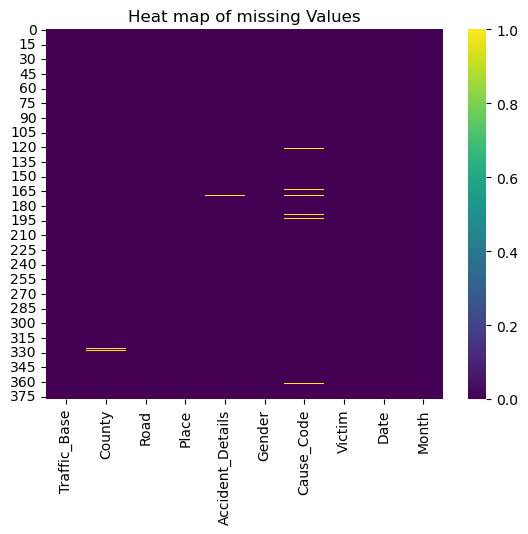

In [48]:
## Visualizing null values using a heatmap

sns.heatmap(data.isnull(), cbar = True, cmap = "viridis")
plt.title('Heat map of missing Values')
plt.show()

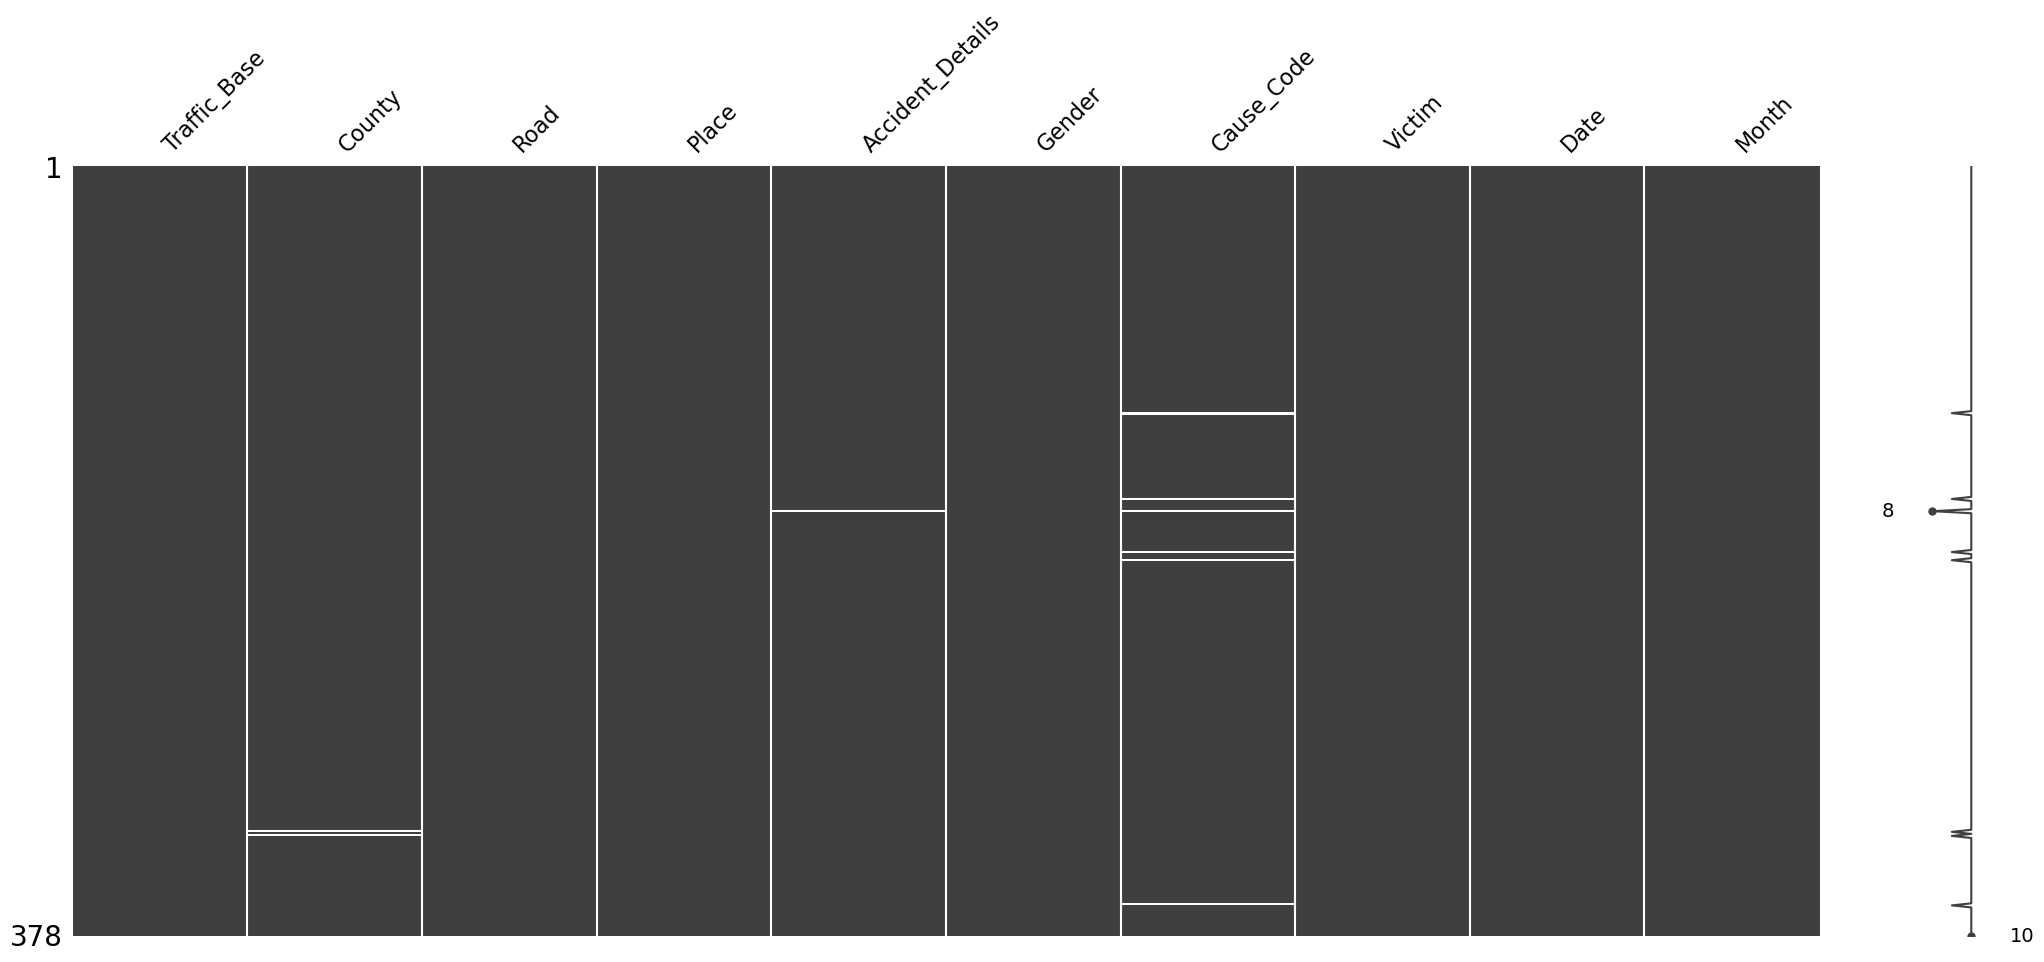

In [49]:
msno.matrix(data) ## Using missingno library to visualize and understand missing data
plt.show()

In [50]:
## Dropping the rows with null values
data.dropna(inplace = True)

In [51]:
data.isnull().sum()

Traffic_Base        0
County              0
Road                0
Place               0
Accident_Details    0
Gender              0
Cause_Code          0
Victim              0
Date                0
Month               0
dtype: int64

In [52]:
## Resetting index

data = data.reset_index(drop = True)

In [53]:
## Checking for duplicates

data.duplicated().sum() ## This gives a false indicator that duplicates dont exists

0

In [55]:
data

,Traffic_Base,County,Road,Place,Accident_Details,Gender,Cause_Code,Victim,Date,Month
0,Kitui,Makueni,Kitui-Ithokwe,Kitui School,Head On Collision,M,7.0,M/Cyclist,2016-06-25,June
1,Voi,Taita Taveta,Mombasa-Nairobi,Ikanga,Head On Collision,M,25.0,M/Cyclist,2016-06-25,June
2,Mariakani,Kilifi,Mombasa-Nairobi,Katolani,The Unknown M/V Hit The Motor Cycle,M,98.0,M/Cyclist,2016-06-25,June
3,Ongata Rongai,Nakuru,Nakuru-Nairobi,Maasai Lodge,The Vehicle Knocked Down A Pedestrian Who Was ...,M,29.0,Pedestrian,2016-06-25,June
4,Matuu,Machakos,Matuu-Mwingi,Kivandini,The Vehicle Overtook A M/Cycle And Lost Contro...,M,10.0,Passenger,2016-06-25,June
...,...,...,...,...,...,...,...,...,...,...
365,Juja,Kiambu,Thika Superhighway,Near Kalimoni Junior School,The Victim Was Knocked Down By The Unknown M/V,M,63.0,Pedestrian,2016-04-01,April
366,Kajiado,Kajiado,Kajiado Namanga,Near Bisil Town,Head On Collision,M,10.0,M/Cyclist,2016-04-01,April
367,Kajiado,Kajiado,Kajiado Namanga,Near Bisil Town,Head On Collision,M,10.0,P/Passenger,2016-04-01,April
368,Kayole,Nairobi,Spine Road,Near Shujaa Mall,The Victim Tried To Alight While The Vehicle W...,M,70.0,Passenger,2016-04-01,April


In [56]:
data['Cause_Code'].dtype

dtype('float64')

In [58]:
data['Cause_Code'] = data['Cause_Code'].astype(int) ## Changing the data type into integer

In [59]:
data['Cause_Code'].dtype

dtype('int32')

In [60]:
data['Cause_Code'] = data['Cause_Code'].round(0) ## Giving the 'Casue_Code' a whole number value

In [61]:
data

,Traffic_Base,County,Road,Place,Accident_Details,Gender,Cause_Code,Victim,Date,Month
0,Kitui,Makueni,Kitui-Ithokwe,Kitui School,Head On Collision,M,7,M/Cyclist,2016-06-25,June
1,Voi,Taita Taveta,Mombasa-Nairobi,Ikanga,Head On Collision,M,25,M/Cyclist,2016-06-25,June
2,Mariakani,Kilifi,Mombasa-Nairobi,Katolani,The Unknown M/V Hit The Motor Cycle,M,98,M/Cyclist,2016-06-25,June
3,Ongata Rongai,Nakuru,Nakuru-Nairobi,Maasai Lodge,The Vehicle Knocked Down A Pedestrian Who Was ...,M,29,Pedestrian,2016-06-25,June
4,Matuu,Machakos,Matuu-Mwingi,Kivandini,The Vehicle Overtook A M/Cycle And Lost Contro...,M,10,Passenger,2016-06-25,June
...,...,...,...,...,...,...,...,...,...,...
365,Juja,Kiambu,Thika Superhighway,Near Kalimoni Junior School,The Victim Was Knocked Down By The Unknown M/V,M,63,Pedestrian,2016-04-01,April
366,Kajiado,Kajiado,Kajiado Namanga,Near Bisil Town,Head On Collision,M,10,M/Cyclist,2016-04-01,April
367,Kajiado,Kajiado,Kajiado Namanga,Near Bisil Town,Head On Collision,M,10,P/Passenger,2016-04-01,April
368,Kayole,Nairobi,Spine Road,Near Shujaa Mall,The Victim Tried To Alight While The Vehicle W...,M,70,Passenger,2016-04-01,April


The Data is cleaned and ready for Analysis